In [2]:
%matplotlib inline
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import traml
import copy

In [3]:
a = traml.Stack()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |


In [4]:
a.library.search('cu')

|     ID | SHELF   | BOOK    | PAGE        | DESCRIPTION                    |
|--------+---------+---------+-------------+--------------------------------|
| 103501 | main    | CuCl    | Feldman     | Feldman and Horowitz 1969: n 0 |
| 104301 | main    | Cu      | Rakic       | Rakić 1998: n,k 0.2066-12.40 µ |
| 104302 | main    | Cu      | McPeak      | McPeak et al. 2015: Thin film; |
| 104303 | main    | Cu      | Stahrenberg | Stahrenberg et al. 2001: n,k 0 |
| 104304 | main    | Cu      | Babar       | Babar and Weaver 2015: n,k 0.2 |
| 104305 | main    | Cu      | Ordal       | Ordal et al. 1985: n,k 0.517-5 |
| 104306 | main    | Cu      | Hagemann    | Hagemann et al. 1974: n,k 0.00 |
| 104307 | main    | Cu      | Johnson     | Johnson and Christy 1972: n,k  |
| 104308 | main    | Cu      | Brimhall    | Brimhall et al. 2009: n,k 0.01 |
| 109101 | main    | NH3     | Cuthbertson | Cuthbertson and Cuthbertson 19 |
| 114401 | main    | CuGaS2  | Boyd-20-o   | Boyd et al. 1971: n

In [5]:
ag = 100101
sio2 = 111407
zno = 112003
cds = 114203
cdte= 116705
zns = 114301
cu=104301

In [7]:
a.add(sio2, 5)
a.add(cu, 10)
#a.add(cdte, film_type='absorber')

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 5                | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 5                | passive   |
|   2 |     104301 | 10               | passive   |


In [9]:
a.d(2, 5)

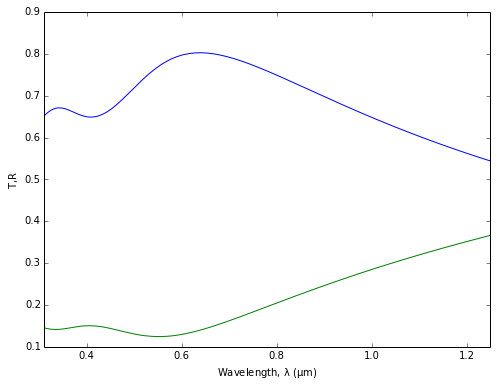

In [10]:
a.plot(o='a')

In [11]:
a.jsc()

24.4097048909 (ma/cm^2)


24.409704890863235

In [17]:
def fun(x, stack, layers, c, delta, TR):
    for i in layers:
          
        
        stack.d(i, x[i-1])
    #stack.d(1,x[0])
    #stack.d(2,x[1])
    for p in x:
        p = np.sqrt(x[0]**2)
    x[0]=np.sqrt(x[0]**2)
    min = 1-stack.average(TR, c, delta, o='a')
    #min = stack.average(TR, c, delta)
    #print min

    return min**10

In [18]:
def minTR(stack, film_range, c, delta, TR='T'):
    print film_range
    x = []
    layers = []
    bnds = []
    for i in range(film_range[0],film_range[1]+1):
        #print i
        x.append(stack.config[i][1])
        layers.append(i)
        bnds.append(stack.config[i][3])
        
    result = minimize(fun, x, args=(stack, layers, c,delta, TR), bounds = bnds,tol=1e-30, method='SLSQP')
    
    #stack.plot()
    print layers
    return result

In [19]:
c = traml.Stack()

peak = 0.6
delta = 0.2
mat2 = 105401 #MgF2
sio2 = 111407 #SiO2
zns = 114801 #ZnS
zno = 112003 #ZnO
mgo = 110902 #MgO
#mat1 = 110104 #Al2O3
zro2 = 112101
stack_list = []

c.add(cu, 1, bnds=(1,1))
c.add(ag, 6, bnds=(6,6))
c.add(zno, 10, bnds = (5, 100))
c.add(cds, 50, bnds=(0, 100))
c.add(cdte, film_type='absorber')

stack_list.append(copy.deepcopy(c))
R=[]
point = []
point.append(c.jsc())
print point
n = [0]
it = [1]

result = minTR(c, [1,len(c.config)-2], peak, delta, TR='T')
point.append(c.jsc())
n.append(0)
stack_list.append(copy.deepcopy(c))

c.remove()
c.remove()
c.remove()
c.remove()
c.remove()

N = 10
for i in range(0, N):
    if i % 2 == 0:
        print 'even', i
        c.add(zns,10, bnds=(0,100))
    else:
        c.add(sio2,10, bnds=(0,100))
        
    c.add(cu, 1,  bnds=(1,1))
    c.add(ag, 6, bnds = (6,6))
        
    c.add(zno, 10, bnds = (5, 100))
    c.add(cds, 50, bnds=(0, 100))
    c.add(cdte, film_type='absorber')
    
    
    result = minTR(c, [1,len(c.config)-2], peak, delta, TR='T')
    R.append(c.average('R',peak,delta))
    n.append(i+1)
    it.append(result.nit)
    stack_list.append(copy.deepcopy(c))
    point.append(c.jsc())
    
    print c.config[i+3][1]
    
   
    c.table()
    print '============================================================================================'
    print c.average('T',peak,delta, o='a')
    
    
    if i !=N-1:
        c.remove()
        c.remove()
        c.remove()
        c.remove()
        c.remove()
        
    print '============================================================================================'
    
    
    
    
 

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     104301 | 1                | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     104301 | 1                | passive   |
|   2 |     100101 | 6                | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     104301 | 1                | passive   |
|   2 |     100101 | 6                | passive   |
|   3 |     112003 | 10               | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+-----

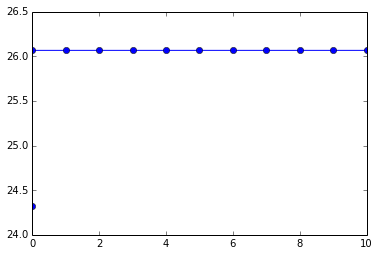

In [20]:
plt.plot(n, point, '-o')

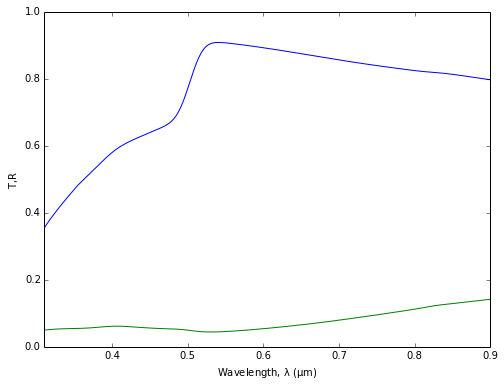

26.0657634177 (ma/cm^2)


26.065763417650089

In [24]:
c.plot(o='a')
c.jsc()

In [25]:
c.table()

|   # |   Material | Thickness (nm)     | Type      |
|-----+------------+--------------------+-----------|
|   0 |     301005 | --                 | substrate |
|   1 |     114801 | 2.25880870751e-20  | passive   |
|   2 |     111407 | -6.10669720454e-22 | passive   |
|   3 |     114801 | 1.52095689123e-21  | passive   |
|   4 |     111407 | 4.57012948109e-24  | passive   |
|   5 |     114801 | 1.04229550665e-21  | passive   |
|   6 |     111407 | -1.59021936302e-23 | passive   |
|   7 |     114801 | 3.08381697594e-21  | passive   |
|   8 |     111407 | 1.67432094189e-24  | passive   |
|   9 |     114801 | 8.26792821415e-21  | passive   |
|  10 |     111407 | 4.7398301768e-17   | passive   |
|  11 |     104301 | 1.0                | passive   |
|  12 |     100101 | 6.0                | passive   |
|  13 |     112003 | 5.0                | passive   |
|  14 |     114203 | 26.4633097157      | passive   |
|  15 |     116705 | 100                | absorber  |
